In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
data=pd.read_csv('StudentsPerformance.csv')
data.isnull().sum() # 0
data.info() # all right with data
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [83]:
data['Total_score']=data['math score']+data['reading score']+data['writing score']
Numeric_data=data[['math score','reading score','writing score','Total_score',]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


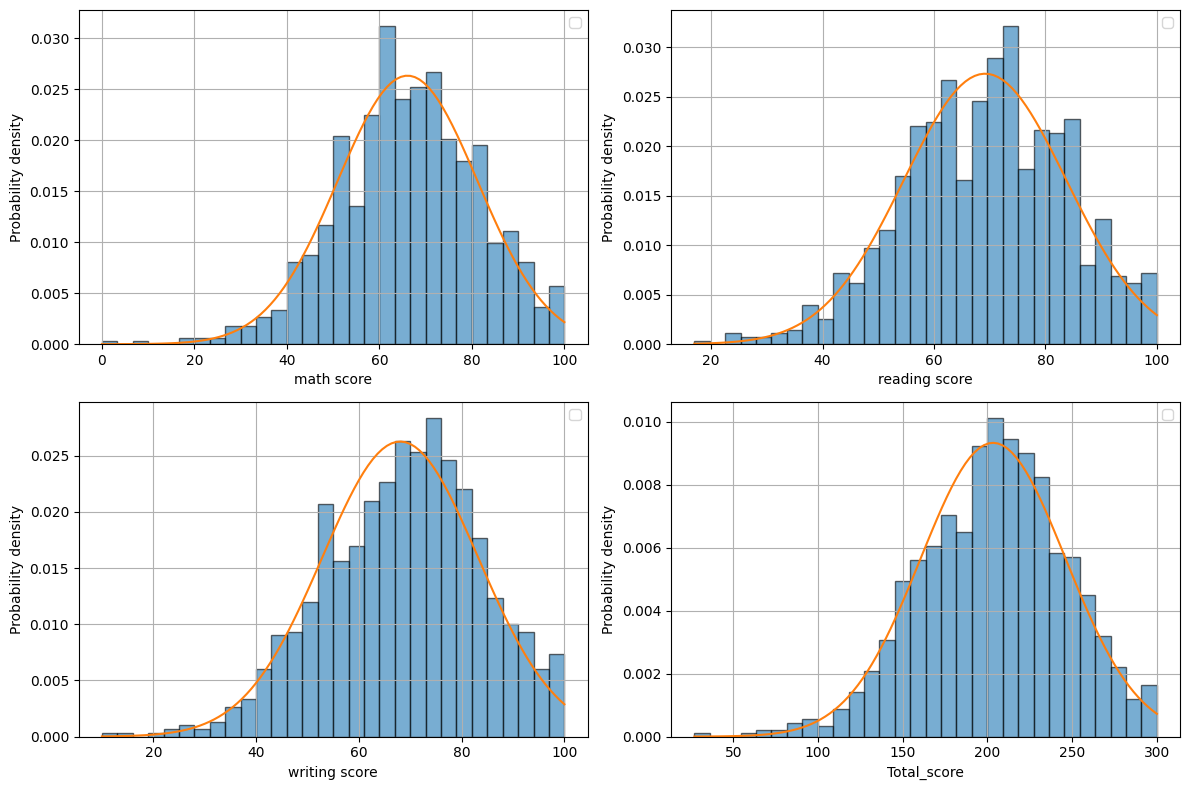

In [84]:
from scipy.stats import norm
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, column in enumerate(Numeric_data):
    data_column = data[column]
    ax = axes[i // 2, i % 2]
    ax.hist(data_column,bins=30, density=True, alpha=0.6, edgecolor='black')

    mu, std = norm.fit(data_column)
    x = np.linspace(data_column.min(), data_column.max(), 100)
    p = norm.pdf(x, mu, std)

    ax.plot(x, p)
    ax.set_xlabel(column)
    ax.set_ylabel('Probability density')
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()


In [85]:
data[['test preparation course','gender','math score','writing score','reading score'
      ]].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

In [86]:
data[['parental level of education', 'gender', 'math score', 'writing score', 'reading score'
      ]].groupby(['parental level of education','gender']).agg('median')

math score  writing score  reading score
parental level of education gender                                          
associate's degree          female        65.0           74.0           75.5
                            male          72.0           65.5           68.0
bachelor's degree           female        67.0           80.0           76.0
                            male          70.0           68.0           67.0
high school                 female        61.0           68.0           69.5
                            male          66.0           58.5           61.5
master's degree             female        64.5           76.5           74.0
                            male          79.0           74.0           77.0
some college                female        65.5           74.5           74.0
                            male          69.0           62.5           63.5
some high school            female        63.0           72.0           71.0
                            male          68.0           61.5           66.0

In [87]:
data[['lunch', 'gender', 'math score', 'writing score', 'reading score'
      ]].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [88]:
data[['gender','math score','writing score','reading score'
      ]].groupby(['gender']).agg('median'),

(        math score  writing score  reading score
 gender                                          
 female        65.0           74.0           73.0
 male          69.0           64.0           66.0,)

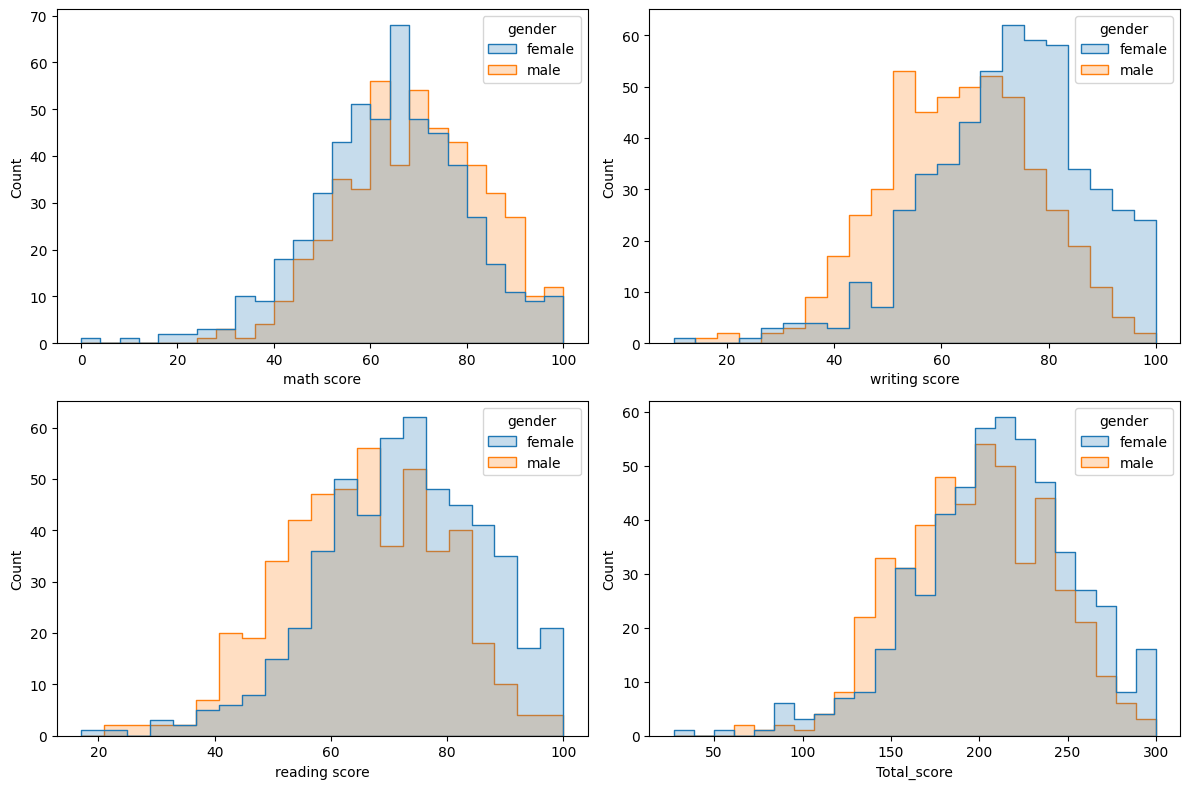

In [89]:
col_gender = ['math score', 'writing score', 'reading score', 'Total_score']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, column in enumerate(col_gender):
    data_column = data[column]
    ax = axes[i // 2, i % 2]
    sns.histplot(data=data, x=column, hue='gender',
                 element='step', common_norm=False, ax=ax)
plt.tight_layout()


In [95]:
data.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Total_score']

In [117]:
import statsmodels.api as sm
X = data[['gender', 'race/ethnicity', 'parental level of education',
          'lunch', 'test preparation course']]
y = data['Total_score']
X = pd.get_dummies(X, columns=['gender', 'race/ethnicity', 'parental level of education',
                   'lunch', 'test preparation course'], drop_first=True)

X = X.astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary().tables[1])


                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           200.8223      5.325     37.714      0.000     190.373     211.272
gender_male                                     -11.1726      2.386     -4.682      0.000     -15.856      -6.490
race/ethnicity_group B                            4.5869      4.835      0.949      0.343      -4.901      14.074
race/ethnicity_group C                            7.1565      4.528      1.581      0.114      -1.729      16.042
race/ethnicity_group D                           15.3773      4.619      3.329      0.001       6.312      24.442
race/ethnicity_group E                           20.7856      5.124      4.056      0.000      10.730      30.841
parental level of education_bachelor's degree     7.6069      4.272      1.781      0.07